In [1]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import collections  as mc


In [2]:
pwd()

'/home/siegman/Documents/Shahar/BarIlan/Dissertation3/notebooks'

In [3]:
midi_path = '../data/MIDI-Freestyle/Freestyle_1003.mid'

In [4]:
mf = m2.midi.MidiFile()
mf.open(midi_path)
mf.read()
mf.close()
   

In [5]:
ev = mf.tracks[0].events


In [6]:
df = pd.DataFrame(data=[e.__dict__ for e in ev])
df.insert(2,'type_str',df.type.map(lambda t: str(t).split('.')[-1]))
df.insert(4,'time_abs',df.time.cumsum())
df

,track,type,type_str,time,time_abs,channel,parameter1,parameter2,centShift,correspondingEvent,lastStatusByte
0,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
1,<music21.midi.MidiTrack 0 -- 4200 events>,MetaEvents.SEQUENCE_TRACK_NAME,SEQUENCE_TRACK_NAME,0,0,NaN,b'7 2-Marimba1 Classic\x00',NaN,None,None,255.0
2,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
3,<music21.midi.MidiTrack 0 -- 4200 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0
4,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4195,<music21.midi.MidiTrack 0 -- 4200 events>,ChannelVoiceMessages.NOTE_ON,NOTE_ON,0,30255,1.0,48,48.0,None,None,144.0
4196,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,13,30268,NaN,None,NaN,None,None,NaN
4197,<music21.midi.MidiTrack 0 -- 4200 events>,ChannelVoiceMessages.NOTE_OFF,NOTE_OFF,0,30268,1.0,48,64.0,None,None,128.0
4198,<music21.midi.MidiTrack 0 -- 4200 events>,DeltaTime,DeltaTime,0,30268,NaN,None,NaN,None,None,NaN


In [7]:
df[df.type_str=='TIME_SIGNATURE']

,track,type,type_str,time,time_abs,channel,parameter1,parameter2,centShift,correspondingEvent,lastStatusByte
3,<music21.midi.MidiTrack 0 -- 4200 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0
5,<music21.midi.MidiTrack 0 -- 4200 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0


In [8]:
df[df.type_str=='DeltaTime'].time.value_counts()

13     288
2      147
12     137
1      127
5      122
      ... 
89       1
95       1
97       1
99       1
120      1
Name: time, Length: 88, dtype: int64

In [9]:
df[df.time > 0].type_str.value_counts()

DeltaTime    2012
Name: type_str, dtype: int64

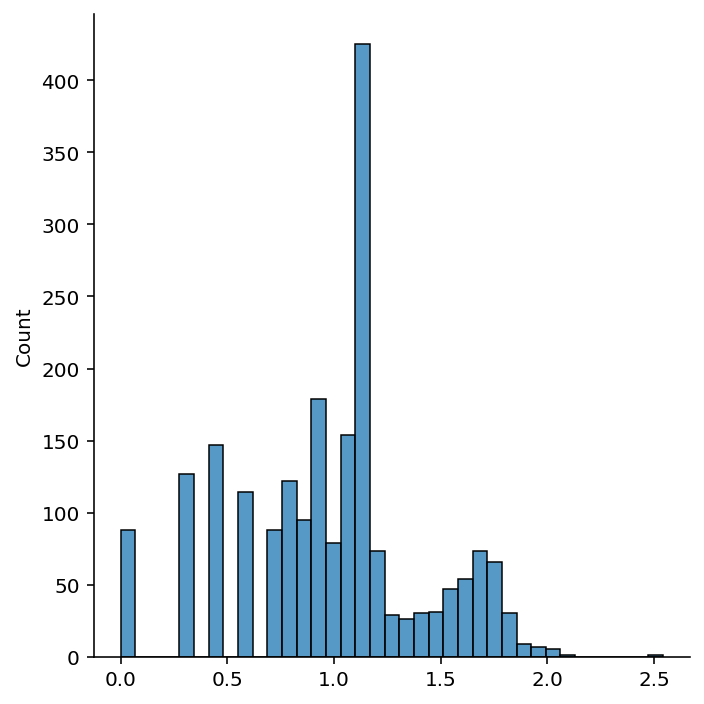

In [10]:
sns.displot(data = np.log10(df['time'][df.type=='DeltaTime'].values+1))

In [11]:
all_events = {}
open_events = {}
for row in df[df.type_str.isin(['NOTE_ON','NOTE_OFF'])].itertuples():
    if row.type_str=='NOTE_ON':
        open_events[row.parameter1]=row.time_abs
    else:
        all_events[row.parameter1]=all_events.get(row.parameter1,[])+[(open_events[row.parameter1], row.time_abs)]


all_events
    

{45: [(348, 355),
  (355, 368),
  (474, 487),
  (597, 610),
  (735, 748),
  (875, 888),
  (1025, 1038),
  (1165, 1178),
  (1242, 1255),
  (1318, 1331),
  (1498, 1511),
  (1544, 1557),
  (1594, 1607),
  (1690, 1703),
  (1788, 1801),
  (1896, 1909),
  (2004, 2017),
  (2115, 2128),
  (2230, 2243),
  (2350, 2363),
  (2467, 2480),
  (2581, 2595),
  (2641, 2654),
  (2694, 2702),
  (2702, 2715),
  (2813, 2826),
  (2934, 2946),
  (3047, 3061),
  (3101, 3103),
  (3103, 3115),
  (3158, 3171),
  (3274, 3287),
  (3394, 3407),
  (3516, 3529),
  (3637, 3650),
  (3773, 3785),
  (3836, 3848),
  (3873, 3886),
  (3896, 3909),
  (4021, 4034),
  (4088, 4101),
  (4132, 4145),
  (4159, 4171),
  (4293, 4305),
  (4357, 4371),
  (4405, 4418),
  (4427, 4441),
  (4583, 4596),
  (4651, 4664),
  (4698, 4711),
  (4724, 4736),
  (4894, 4907),
  (4958, 4971),
  (4999, 5012),
  (5025, 5037),
  (5112, 5125),
  (5199, 5211),
  (5273, 5286),
  (5323, 5336),
  (5346, 5359),
  (5430, 5443),
  (5505, 5519),
  (5581, 5593),


In [12]:
list(all_events.keys())

[45, 48, 43]

In [13]:
[len(a) for a in all_events.values()]

[333, 375, 340]

In [15]:
lines = [
    [[(t[0],k),(t[1],k)] for t in v]
    for k, v in all_events.items()
]
lines=sum(lines,[])

lines[:4]

[[(348, 45), (355, 45)],
 [(355, 45), (368, 45)],
 [(474, 45), (487, 45)],
 [(597, 45), (610, 45)]]

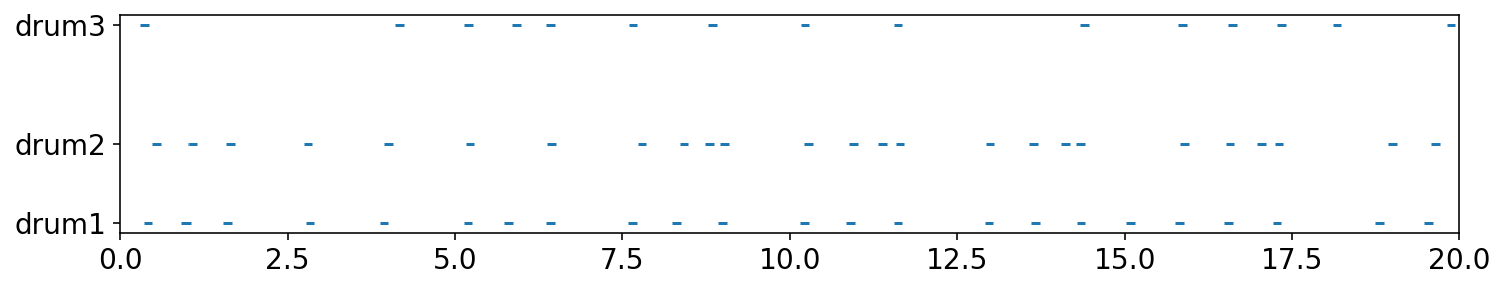

In [16]:
fig, ax = plt.subplots(figsize=(12,2))
ax.add_collection(mc.LineCollection(lines))
#    [(1, 0), (2, 0)],
#    [(3128, 3134), (43, 43)]
#    ]))
ax.autoscale()
plt.xlim(3000,5000)
plt.xscale("linear")
plt.xticks(range(3000,5001,250),np.arange(0,21.,2.5),fontsize=14);
plt.yticks([43,45,48],['drum{}'.format(a) for a in range(1,4)],fontsize=14);

In [19]:
durs= {k: [v[1]-v[0] for v in val] for k,val in all_events.items()}
durs[43]

[13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 13,
 13,
 13,
 12,
 13,
 13,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 13,
 13,
 13,
 12,
 13,
 13,
 14,
 14,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 13,
 13,
 12,
 13,
 13,
 12,
 13,
 13,
 14,
 12,
 13,
 13,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 13,
 12,
 13,
 12,
 13,
 13,
 13,
 12,
 13,
 12,
 14,
 12,
 13,
 14,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 13,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 13,
 13,
 12,
 13,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 13,
 13,
 13,
 12,
 12,
 13,
 13,
 14,
 14,
 13,
 12,
 13,
 13,
 13,
 12,
 13,
 13,
 14,
 13,
 13,
 13,
 13,
 12,
 13,
 13,
 13,
 14,
 13,
 13,
 13,
 14,
 12,
 14,
 13,
 13,
 12,
 13,
 12,
 13,
 13,
 12,
 14,
 13,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 14,
 13,
 13,
 13,
 13,
 14,
 13,
 13,
 13,
 13,
 14,
 13,
 13,
 13,
 12,
 12,
 13,
 13,
 13,
 9,
 13,
 12,
 13,
 14,
 13,
 13,
 13,
 

In [23]:
from collections import Counter
dur_hist = {k: Counter(v).most_common(3) for k, v in durs.items()}

In [24]:

dur_hist

{45: [(13, 215), (12, 66), (14, 39)],
 48: [(13, 254), (12, 78), (14, 39)],
 43: [(13, 231), (12, 68), (14, 38)]}

In [25]:
215+66+39, 254+78+39, 231+68+38

(320, 371, 337)

In [102]:
event_queue = []
counters = [0]*3

keys = list(all_events.keys())
values = [[v[0] for v in val] for val in all_events.values()]

active = 3

lens = [len(v) for v in values]
while active:
    next_event_key = np.argmin([v[i] if i<len(v) else np.inf for v,i in zip(values,counters)])
    rec = (values[next_event_key][counters[next_event_key]],keys[next_event_key],counters.copy()) 
    print(counters,next_event_key,[v[i] for v,i in zip(values,counters)], rec)
    counters[next_event_key] += 1
    event_queue.append(rec)
    
    #print(' 1'[counters[next_event_key]==lens[next_event_key]],end='')
    active -= (counters[next_event_key]==lens[next_event_key])
    #if counters.max()==10: break

[0, 0, 0] 0 [348, 405, 600] (348, 45, [0, 0, 0])
[1, 0, 0] 0 [355, 405, 600] (355, 45, [1, 0, 0])
[2, 0, 0] 1 [474, 405, 600] (405, 48, [2, 0, 0])
[2, 1, 0] 0 [474, 499, 600] (474, 45, [2, 1, 0])
[3, 1, 0] 1 [597, 499, 600] (499, 48, [3, 1, 0])
[3, 2, 0] 0 [597, 703, 600] (597, 45, [3, 2, 0])
[4, 2, 0] 2 [735, 703, 600] (600, 43, [4, 2, 0])
[4, 2, 1] 2 [735, 703, 661] (661, 43, [4, 2, 1])
[4, 2, 2] 1 [735, 703, 721] (703, 48, [4, 2, 2])
[4, 3, 2] 2 [735, 770, 721] (721, 43, [4, 3, 2])
[4, 3, 3] 0 [735, 770, 983] (735, 45, [4, 3, 3])
[5, 3, 3] 1 [875, 770, 983] (770, 48, [5, 3, 3])
[5, 4, 3] 1 [875, 840, 983] (840, 48, [5, 4, 3])
[5, 5, 3] 0 [875, 919, 983] (875, 45, [5, 5, 3])
[6, 5, 3] 1 [1025, 919, 983] (919, 48, [6, 5, 3])
[6, 6, 3] 2 [1025, 999, 983] (983, 43, [6, 6, 3])
[6, 6, 4] 1 [1025, 999, 1091] (999, 48, [6, 6, 4])
[6, 7, 4] 0 [1025, 1081, 1091] (1025, 45, [6, 7, 4])
[7, 7, 4] 1 [1165, 1081, 1091] (1081, 48, [7, 7, 4])
[7, 8, 4] 2 [1165, 1176, 1091] (1091, 43, [7, 8, 4])
[7, 

[245, 274, 240] 0 [22704, 22756, 22817] (22704, 45, [245, 274, 240])
[246, 274, 240] 1 [22823, 22756, 22817] (22756, 48, [246, 274, 240])
[246, 275, 240] 1 [22823, 22809, 22817] (22809, 48, [246, 275, 240])
[246, 276, 240] 2 [22823, 22882, 22817] (22817, 43, [246, 276, 240])
[246, 276, 241] 0 [22823, 22882, 22879] (22823, 45, [246, 276, 241])
[247, 276, 241] 2 [22948, 22882, 22879] (22879, 43, [247, 276, 241])
[247, 276, 242] 1 [22948, 22882, 23007] (22882, 48, [247, 276, 242])
[247, 277, 242] 1 [22948, 22933, 23007] (22933, 48, [247, 277, 242])
[247, 278, 242] 0 [22948, 23000, 23007] (22948, 45, [247, 278, 242])
[248, 278, 242] 1 [23012, 23000, 23007] (23000, 48, [248, 278, 242])
[248, 279, 242] 2 [23012, 23063, 23007] (23007, 43, [248, 279, 242])
[248, 279, 243] 0 [23012, 23063, 23201] (23012, 45, [248, 279, 243])
[249, 279, 243] 1 [23078, 23063, 23201] (23063, 48, [249, 279, 243])
[249, 280, 243] 0 [23078, 23129, 23201] (23078, 45, [249, 280, 243])
[250, 280, 243] 1 [23208, 23129, 2

IndexError: list index out of range

In [100]:
print(values[0][:10])
print(values[1][:10])
print(values[2][:10])

[348, 355, 474, 597, 735, 875, 1025, 1165, 1242, 1318]
[405, 499, 703, 770, 840, 919, 999, 1081, 1176, 1253]
[600, 661, 721, 983, 1091, 1166, 1247, 1325, 1368, 1402]


In [104]:
x= [x[0] for x in event_queue]
y = np.vstack([x[2] for x in event_queue])
y

array([[  0,   0,   0],
       [  1,   0,   0],
       [  2,   0,   0],
       ...,
       [331, 373, 338],
       [331, 373, 339],
       [332, 373, 339]])

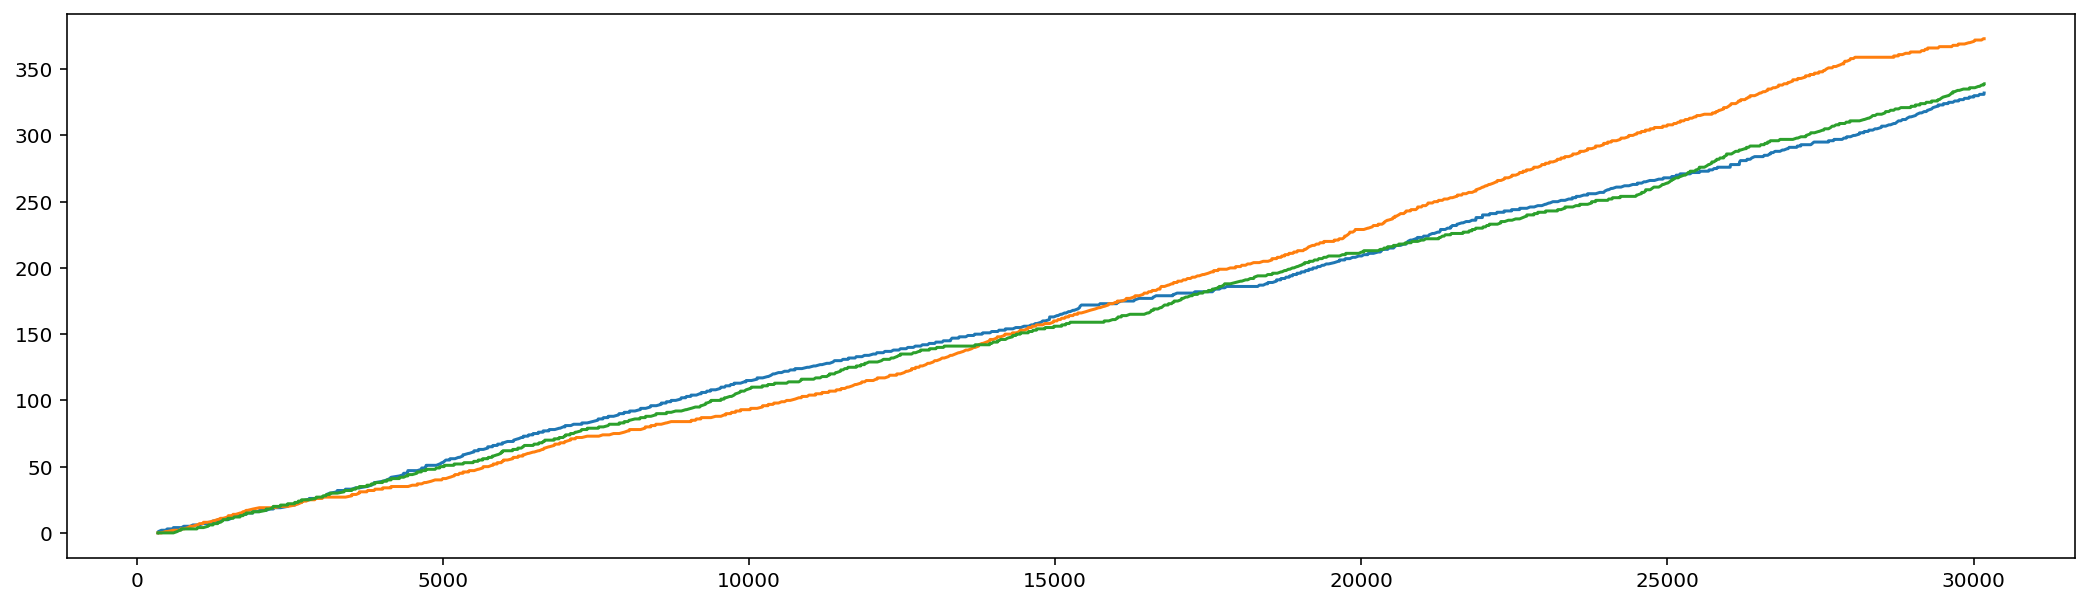

In [106]:
plt.figure(figsize=(18,5))
plt.plot(x,y)


In [86]:
np.all(np.logical_or(np.diff(y.T)==0,  np.diff(y.T)==1))

True

In [92]:
np.all(np.diff(x)>=0)

False

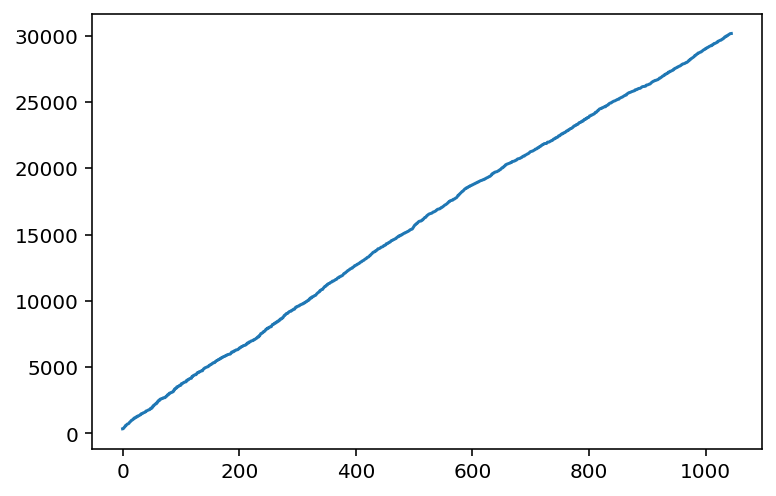

In [107]:
plt.plot(x)

In [99]:
np.diff(values[2])

array([ 61,  60, 262, 108,  75,  81,  78,  43,  34,  84,  89, 113,  48,
        51, 109, 108, 110,  54,  57, 118, 121, 116,  55,  58, 125, 106,
       111,  56,  62, 124, 111, 125,  60,  63, 122,  66,  68, 123,  69,
        71, 136,  69,  69,  73,  73,  73,  74, 152,  73,  75, 157, 151,
       165,  77,  79,  83,  66,  25,  71,  52,  25, 165,  84,  61,  31,
       161,  84,  64,  33, 160,  82,  67,  33,  79,  59,  43,  78,  99,
       182,  85,  77, 179,  82,  62,  29, 164,  91,  91,  81, 173,  77,
       166,  83,  78, 138,  28,  66,  24,  63, 165,  51,  32,  92,  41,
        29,  63,  73,  32,  73, 188,  89, 105, 208, 198,  33, 210, 105,
       109,  39,  86,  33,  64,  41,  69, 148,  72,  63,  28, 184,  66,
       134,  61,  57,  56, 185,  64,  73, 148, 110, 123, 511, 243,  34,
        94,  26, 105,  33,  82,  55,  70, 133,  65,  68, 137, 145, 129,
        64,  61, 564,  81, 109,  32,  63,  84, 291,  73,  34,  42,  74,
        57,  25,  84,  58,  34,  67,  57,  32,  69,  79,  85,  8